In [1]:
import scanpy as sc
import scanpy as sc
import numpy as np
import pandas as pd
import leidenalg
from matplotlib.pyplot import rc_context
import anndata as ad
import celltypist
from celltypist import models
import scrublet as scr

In [2]:
# Reading the data files in scanpy
adata_A1 = sc.read_10x_mtx('/Users/tomwolstenholme-hogg/Documents/Research_project/GSE175814_RAW/GSM5348374_A1', var_names='gene_symbols')
adata_A2 = sc.read_10x_mtx('/Users/tomwolstenholme-hogg/Documents/Research_project/GSE175814_RAW/GSM5348374_A2', var_names='gene_symbols')
adata_A3 = sc.read_10x_mtx('/Users/tomwolstenholme-hogg/Documents/Research_project/GSE175814_RAW/GSM5348374_A3', var_names='gene_symbols')
adata_A4 = sc.read_10x_mtx('/Users/tomwolstenholme-hogg/Documents/Research_project/GSE175814_RAW/GSM5348374_A4', var_names='gene_symbols')


In [3]:
# Adding metadata for each sample
adata_A1.obs["sample_name"] = "A1"
adata_A2.obs['sample_name'] = 'A2'
adata_A3.obs['sample_name'] = 'A3'
adata_A4.obs['sample_name'] = 'A4'

In [4]:
adatas = [adata_A1, adata_A2, adata_A3, adata_A4]
adatas = ad.concat(adatas, merge='same')
adatas.var_names_make_unique()
adatas.obs_names_make_unique()





In [5]:
adata_A1.var['mt'] = adata_A1.var.index.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata_A1, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
# Sorting data
adata_A2.var['mt'] = adata_A2.var.index.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata_A2, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
adata_A3.var['mt'] = adata_A3.var.index.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata_A3, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
adata_A4.var['mt'] = adata_A4.var.index.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata_A4, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

... storing 'sample_name' as categorical
... storing 'feature_types' as categorical


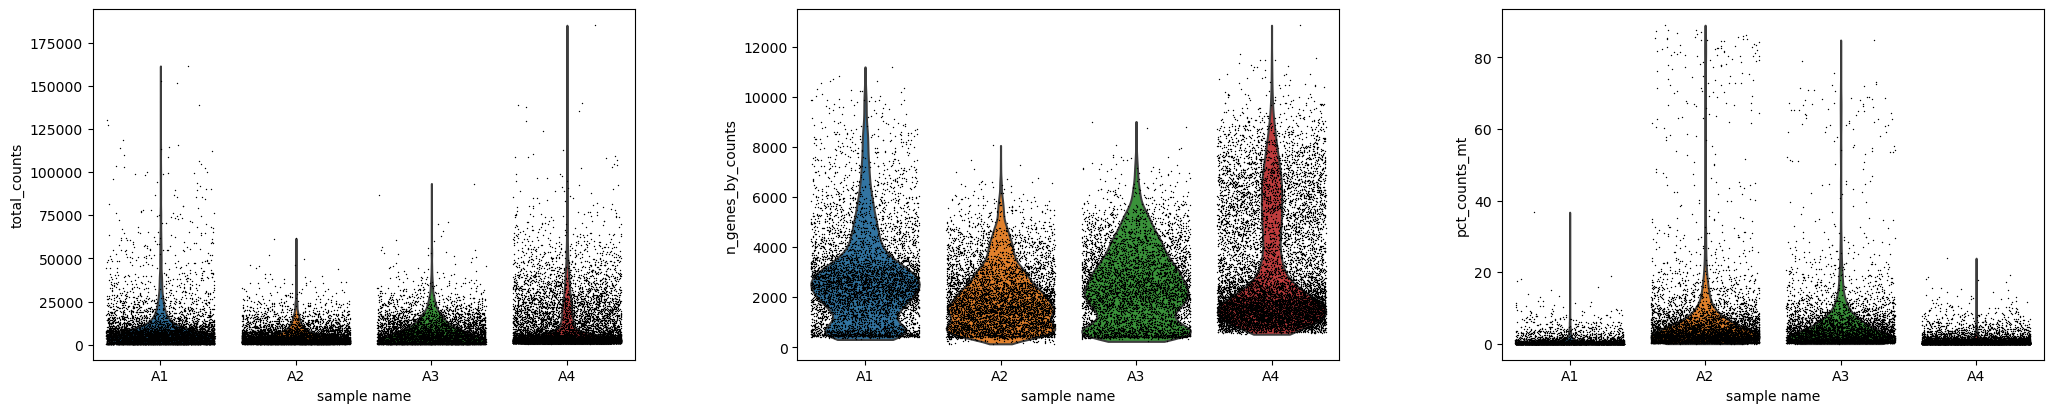

In [6]:
# Creating a column of just MT genes.
adatas.var['mt'] = adatas.var.index.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adatas, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(adatas, keys=['total_counts', 'n_genes_by_counts', 'pct_counts_mt'], groupby='sample_name', jitter=0.4, multi_panel=True)




In [7]:
# Filtering the data for A1
adata_A1 = adata_A1[adata_A1.obs['n_genes_by_counts'] < 8000]
adata_A1 = adata_A1[adata_A1.obs['n_genes_by_counts'] > 1000]
           
adata_A1 = adata_A1[3000 < adata_A1.obs['total_counts']]
adata_A1 = adata_A1[50000 > adata_A1.obs['total_counts']]
adata_A1 = adata_A1[adata_A1.obs['pct_counts_mt'] < 10]

# Filtering for A2
adata_A2 = adata_A2[500 < adata_A2.obs['n_genes_by_counts']]
adata_A2 = adata_A2[6000 > adata_A2.obs['n_genes_by_counts']]

adata_A2 = adata_A2[2000 < adata_A2.obs['total_counts']]
adata_A2 = adata_A2[50000 > adata_A2.obs['total_counts']]
adata_A2 = adata_A2[adata_A2.obs['pct_counts_mt'] < 25]

# Filtering for A3
adata_A3 = adata_A3[1000 < adata_A3.obs['n_genes_by_counts']]
adata_A3 = adata_A3[7000 > adata_A3.obs['n_genes_by_counts']]


adata_A3 = adata_A3[5000 < adata_A3.obs['total_counts']]
adata_A3 = adata_A3[50000 > adata_A3.obs['total_counts']]
adata_A3 = adata_A3[adata_A3.obs.pct_counts_mt < 15]

# Filtering for A4
adata_A4 = adata_A4[500 < adata_A4.obs['n_genes_by_counts']]
adata_A4 = adata_A4[8000 > adata_A4.obs['n_genes_by_counts']]

adata_A4 = adata_A4[2000 < adata_A4.obs['total_counts']]
adata_A4 = adata_A4[60000 > adata_A4.obs['total_counts']]
                    
adata_A4 = adata_A4[adata_A4.obs.pct_counts_mt < 25]

In [8]:
# def scrubbing(datas):
    
#     scrub = scr.Scrublet(datas.X)

#     # Perform doublet detection
#     scrub_results = scrub.scrub_doublets(min_counts=2, min_cells=3, n_prin_comps=30)

#     datas.obs['doublet_scores'] = scrub_results[0]
#     datas.obs['predicted_doublets'] = scrub_results[1]

#     # Filter out predicted doublets
#     datas = adatas[adatas.obs['predicted_doublets'] == False]

#     # Ensure the AnnData object is properly updated
#     datas.raw = adatas.copy()
#     scrub.plot_histogram()
#     scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))
#     scrub.plot_embedding('UMAP', order_points=True);
#     adatas.obs['predicted_doublets'].value_counts()
#     return datas
# adatas = scrubbing(adatas)

In [9]:
# Forming the separate data, AD
AD_adata = [adata_A1, adata_A3]

In [10]:

AD_adata = ad.concat(AD_adata, merge='same')
AD_adata.var_names_make_unique()
AD_adata.obs_names_make_unique()

# Forming control

C_adata = [adata_A2, adata_A4]
C_adata = ad.concat(C_adata, merge='same')
C_adata.var_names_make_unique()
C_adata.obs_names_make_unique()



In [11]:
def plotting_violins(data):
    data.var['mt'] = data.var.index.str.startswith('MT-')
    sc.pp.calculate_qc_metrics(data, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
    sc.pl.violin(data, keys=['total_counts', 'n_genes_by_counts', 'pct_counts_mt'], groupby='sample_name', jitter=0.4, multi_panel=True)
    return data

... storing 'sample_name' as categorical
... storing 'feature_types' as categorical


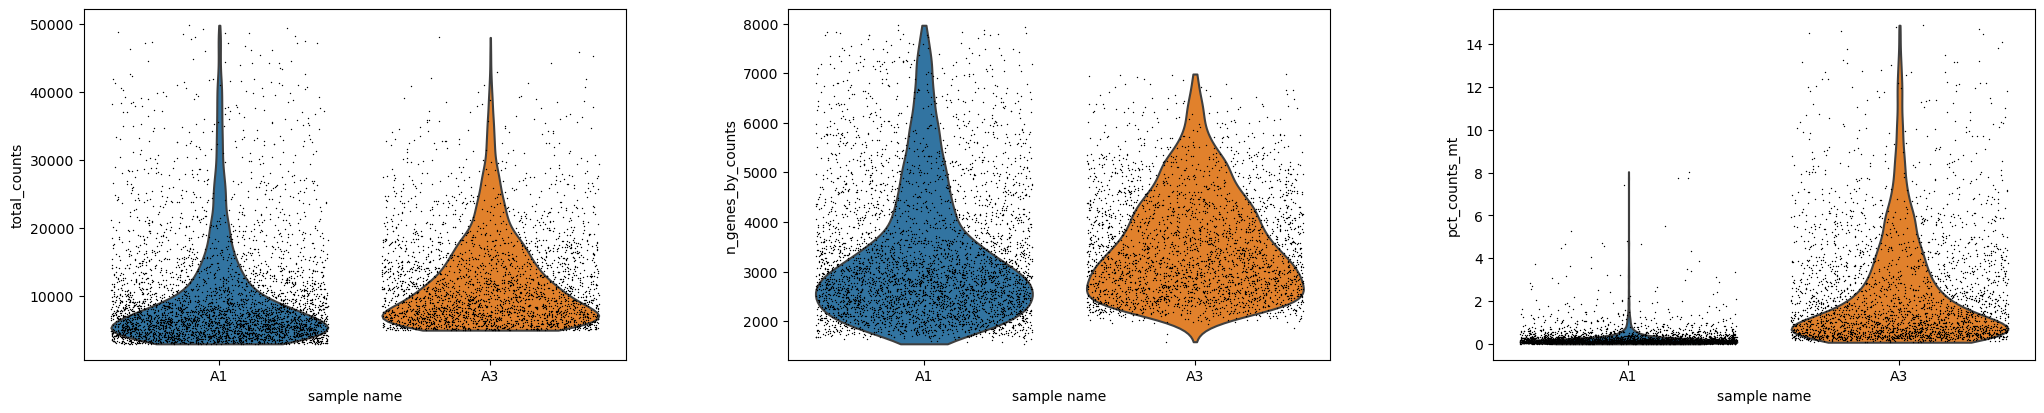

... storing 'sample_name' as categorical
... storing 'feature_types' as categorical


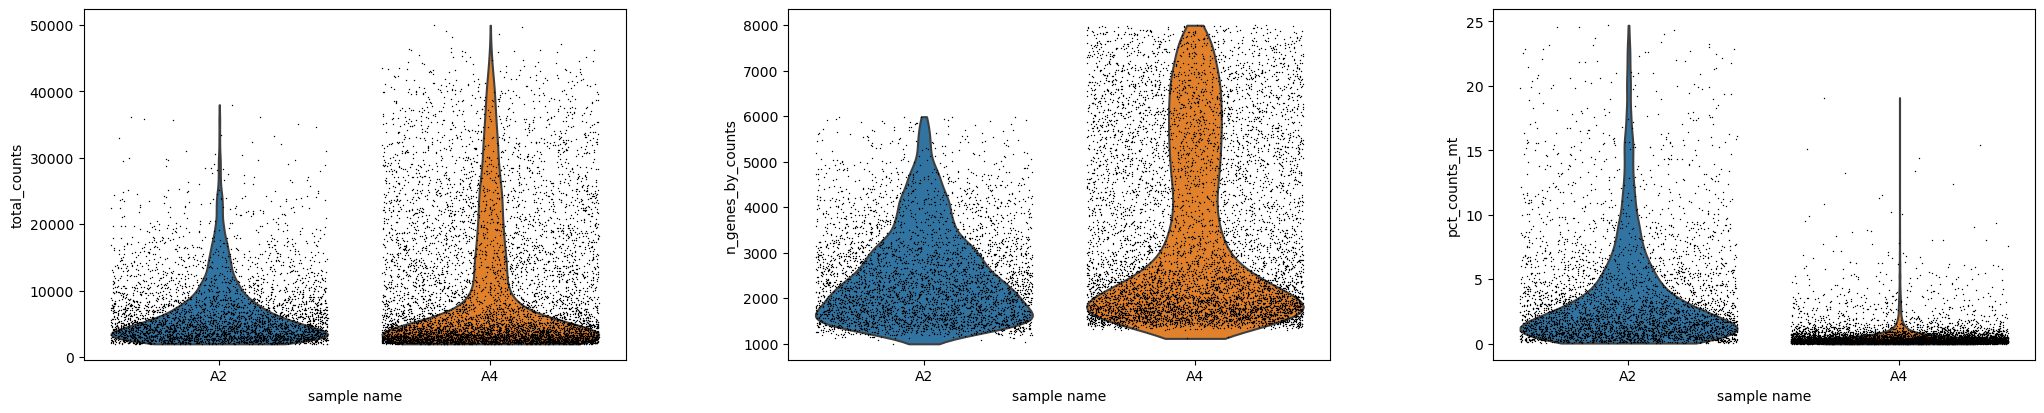

In [12]:
AD_adata = plotting_violins(AD_adata)
C_adata = plotting_violins(C_adata)

In [13]:
# Normalisation
#def normalisation(data):
sc.pp.normalize_total(adatas, target_sum=1e4) # Normalises every cell to 10,000 UMI (10,000 unique molecular identifiers)
sc.pp.log1p(adatas)
sc.pp.highly_variable_genes(adatas, n_top_genes= 2000)

# Makes the numbers more comparable
#adatas = normalisation(adatas)

In [14]:
# Doing the same for alzheimer's samples
sc.pp.normalize_total(AD_adata, target_sum=1e4) # Normalises every cell to 10,000 UMI (10,000 unique molecular identifiers)
sc.pp.log1p(AD_adata)
sc.pp.highly_variable_genes(AD_adata, n_top_genes= 2000)
#AD_adata = normalisation(AD_adata)
#C_adata = normalisation(C_adata)
sc.pp.normalize_total(C_adata, target_sum=1e4) # Normalises every cell to 10,000 UMI (10,000 unique molecular identifiers)
sc.pp.log1p(C_adata)
sc.pp.highly_variable_genes(C_adata, n_top_genes= 2000)

In [15]:
# PCA function
# def PCA(data, pcs):
#     data = data[:, data.var.highly_variable]
#     sc.pp.regress_out(data, ['total_counts', 'pct_counts_mt', 'n_genes_by_counts'])
#     sc.pp.scale(data, max_value=10) 
#     sc.tl.pca(data, svd_solver='arpack')
#     sc.pl.pca_variance_ratio(data, log=True, n_pcs= pcs)
#     data.raw = data
#     return data
    

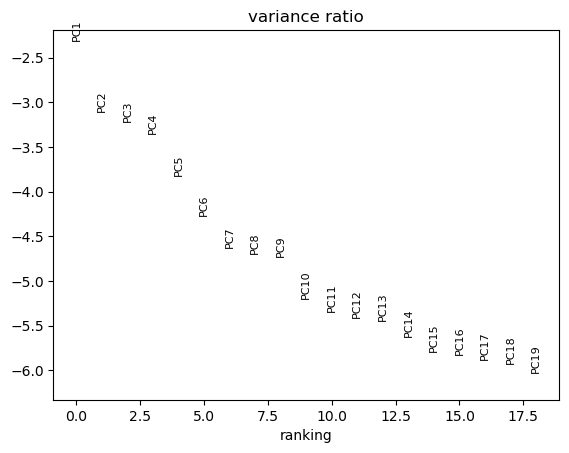

In [16]:
AD_adata = AD_adata[:, AD_adata.var.highly_variable]
sc.pp.regress_out(AD_adata, ['total_counts', 'pct_counts_mt', 'n_genes_by_counts'])
sc.pp.scale(AD_adata, max_value=10) 
sc.tl.pca(AD_adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(AD_adata, log=True, n_pcs= 18)
AD_adata.raw = AD_adata


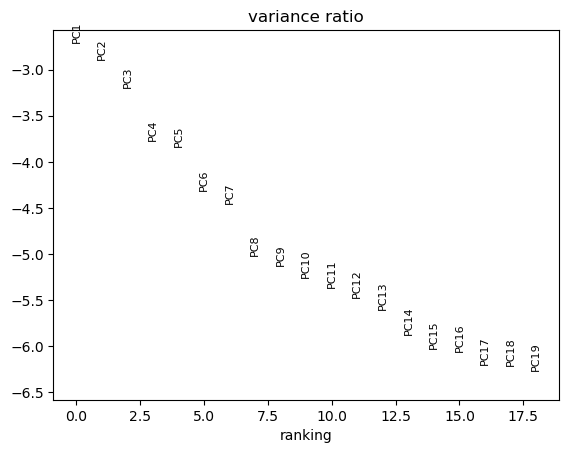

In [17]:
C_adata = C_adata[:, C_adata.var.highly_variable]
sc.pp.regress_out(C_adata, ['total_counts', 'pct_counts_mt', 'n_genes_by_counts'])
sc.pp.scale(C_adata, max_value=10) 
sc.tl.pca(C_adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(C_adata, log=True, n_pcs= 18)
C_adata.raw = C_adata

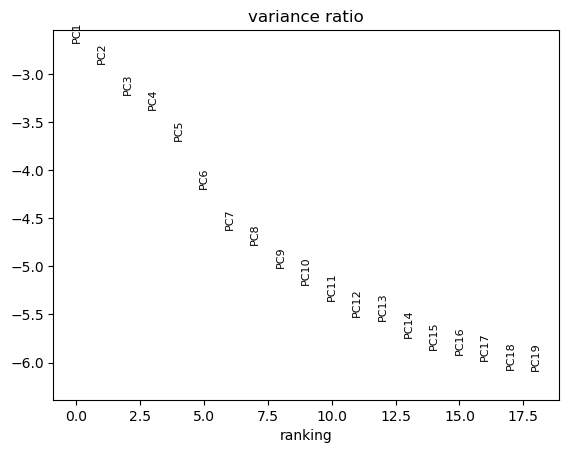

In [18]:
adatas = adatas[:, adatas.var.highly_variable]
sc.pp.regress_out(adatas, ['total_counts', 'pct_counts_mt', 'n_genes_by_counts'])
sc.pp.scale(adatas, max_value=10) 
sc.tl.pca(adatas, svd_solver='arpack')
sc.pl.pca_variance_ratio(adatas, log=True, n_pcs= 18)
adatas.raw = adatas

In [19]:
#AD_adata = PCA(AD_adata, 20)

In [20]:
# Reducing it to 22 PCs as that is when the variance becomes irrelevant
ad = AD_adata.uns['pca']['variance'] 
# Able to see eigen value for each PC, allows us to workout the the percentage
# variance that each PC shows.
def percentage_variance_calc(data):
    count = 0
    n = 0
    for i in data:
        n = n + (100*i/sum(data))
        print(n)
        count += 1
        print(count)
# for loop to workout the percentage variance so I know where to chop it off
percentage_variance_calc(ad)
    
# Currently not working not sure why


27.09719498042863
1
39.31070808603155
2
50.25042541273287
3
59.81190452586047
4
65.80065852491644
5
69.59559248495002
6
72.25609356999024
7
74.7468320243821
8
77.16816387374685
9
78.67845797859752
10
79.98371898670975
11
81.19803548098717
12
82.37898081439103
13
83.36403378214439
14
84.19779466105098
15
85.0011656022861
16
85.75999439872506
17
86.48592431920176
18
87.1442721664436
19
87.78405361431176
20
88.37768901613842
21
88.9370504790619
22
89.47437061149807
23
89.99337332575624
24
90.50774878492156
25
91.0029244919726
26
91.49639543272112
27
91.97395047737928
28
92.42998380284327
29
92.87100867887926
30
93.30700152183441
31
93.73271670868033
32
94.15039081569823
33
94.55899757199266
34
94.95673288986471
35
95.33511770396552
36
95.70172299292713
37
96.06519687178364
38
96.4187105239065
39
96.7685689001513
40
97.11700488707336
41
97.45909590090925
42
97.79685419766736
43
98.1275875199216
44
98.44666970443681
45
98.76203241937388
46
99.07502262175167
47
99.38598287249697
48
99.694113

In [21]:
# Doing PCA on control
#PCA(C_adata, 17)

NameError: name 'PCA' is not defined

In [ ]:
# try:
#     cd = C_adata.uns['pca']['variance'] 
#     percentage_variance_calc(cd)

# except KeyError:
#     print('pca not found in C_adata.uns')

In [22]:
# Making plotting PCAs as UMAP function
def plot_PCA(data, pcs):
    sc.pp.neighbors(data, n_pcs= pcs) # Forms neighbourhood matrices.
    sc.tl.leiden(data) # Needed to add this in for some reason when i re ran it, but now it works, looks different to before.
    sc.tl.paga(data)
    sc.pl.paga(data, plot=False) # Can remove plot=False if we want to remove the coarse-grained graph
    sc.tl.umap(data, init_pos='paga')


In [ ]:
# Using that function
plot_PCA(AD_adata, 20)
plot_PCA(C_adata, 18)

In [ ]:
sc.tl.leiden(C_adata, resolution= 0.5)
sc.pl.umap(C_adata, color='leiden', save=({'.png'}, True))

In [ ]:
with rc_context({'figure.figsize': (3, 3)}):
    sc.pl.umap(AD_adata, color='sample_name', save=True)

In [ ]:
with rc_context({'figure.figsize': (3, 3)}):
   
    sc.pl.umap(C_adata, color='sample_name', save=True)

In [ ]:
sc.tl.leiden(C_adata, key_added='clusters', resolution=0.5)
with rc_context ({'figure.figsize': (5, 5)}):
    sc.pl.umap(C_adata, color='clusters', add_outline=True,
                legend_loc='on data', legend_fontsize=12, legend_fontoutline=2, frameon=False,
                title='Clustering of cells', palette='Set1')

In [ ]:
models.download_models(force_update = True)

In [ ]:
model = models.Model.load(model = 'Human_AdultAged_Hippocampus.pkl')
mouse_model = models.Model.load(model = 'Developing_Mouse_Brain.pkl')

In [ ]:
predictions = celltypist.annotate(AD_adata, model= 'Human_AdultAged_Hippocampus.pkl',
                                 majority_voting = True)
#predictions.predicted_labels.predicted_labels
AD_adata.obs["celltypist_preds"] = predictions.predicted_labels.predicted_labels
#predictions.predicted_labels.predicted_labels.index.value_counts()
#AD_adata



In [ ]:
sc.tl.rank_genes_groups(AD_adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(AD_adata, n_genes=25, sharey=False)


In [ ]:
sc.tl.umap(AD_adata)
#sc.pl.umap(AD_adata, color='leiden', legend_loc= 'on data')
sc.pl.umap(AD_adata, color='celltypist_preds', legend_loc= 'on data', save=True)


In [ ]:
# Downloading the le_manno data, issue im having is where do i download it from in the first place?

In [ ]:
le_manno_ref = sc.read_h5ad('/Users/tomwolstenholme-hogg/Documents/Research_project/le_manno_ref.h5ad')

le_manno_ref

In [ ]:
# Integrating the data
sc.tl.ingest(adatas, le_manno_ref, obs='leidig')
adatas.uns['leidig_colors'] = le_manno_ref.uns['leidig_colors']
sc.pl.umap(adatas, colors=['leidig', 'bulk_labels'], wspace=0.5)